Leeza Sergeeva
3/28/2022
Homework 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.metrics import accuracy_score


Use the examples in the notebook from class to do the following:

1. Fit a logistic regression classifier. How accurate is your model at predicting the correct class? Is the model underfitting or overfitting the data? Explain.

In [2]:
cluster_df=pd.read_csv('data/cluster_hw.csv')
cluster_df.head()

,Unnamed: 0,feat1,feat2,Class
0,0,1.126107,-0.363169,0
1,1,0.380427,0.381545,1
2,2,-0.095709,-0.350235,1
3,3,1.182031,0.046286,0
4,4,-0.657046,1.106598,0


In [3]:
#  implement logistic regression
X=cluster_df[['feat1','feat2']]
y=cluster_df['Class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [5]:
reglrmod=LogisticRegression(random_state=0).fit(X_train[['feat1','feat2']],y_train)

In [6]:
reglrmod.coef_

array([[ 0.11192914, -0.02625497]])

In [7]:
lrcm=pd.crosstab(reglrmod.predict(X_test[['feat1','feat2']]),y_test)
lrcm

Class,0,1
row_0,,
0,80,11
1,159,200


In [8]:
print("Accuracy of a logistic regression classifier model is:",
    accuracy_score(reglrmod.predict(X_test[['feat1','feat2']]),y_test))

Accuracy of a logistic regression classifier model is: 0.6222222222222222


In [9]:
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 2, 500))
X_grid = np.c_[xx.ravel(), yy.ravel()]

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


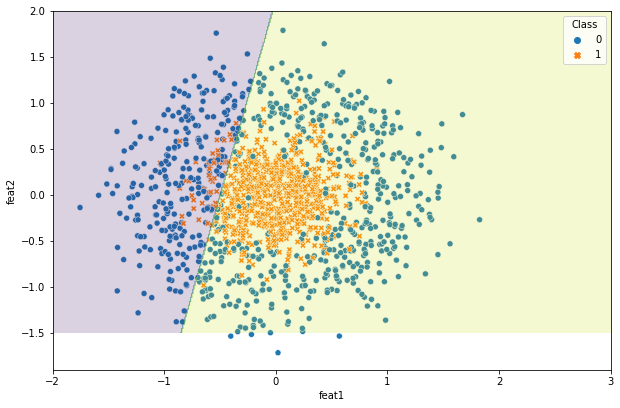

In [10]:
zz_lr3 = reglrmod.predict_proba(X_grid)[:,1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(10, 6.6))
sns.scatterplot(x='feat1',y='feat2',hue='Class',style='Class',data=cluster_df)
plt.contourf(xx, yy, zz_lr3 > 0.5, alpha=0.2)
plt.show()

Logistic regression model is underfitting, as it's not flexible enough to reflect the true relationship between  𝑥  and  𝑦 .

In [ ]:
hpq_mod=ols(formula='mpg~horsepower+np.power(horsepower,2)',data=cars).fit()
hpq_mod.summary()

2. Use cross validation to fit logistic regression models whose decision boundaries are polynomial, with degrees 1,2,3,4, and 5. Which model would you choose based on the cross validation scores (i.e., the average model accuracy over the 5 folds)?
(In 1 and 2, be sure to evaluate your models on test data that the classifier hasn't seen!)

In [11]:
X['f12']=X['feat1']**2 #feature one squared etc.
X['f22']=X['feat2']**2
X['f13']=X['feat1']**3
X['f23']=X['feat2']**3
X['f14']=X['feat1']**4
X['f24']=X['feat2']**4
X['f15']=X['feat1']**5
X['f25']=X['feat2']**5

<ipython-input-11-cc30a94f69c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['f12']=X['feat1']**2 #feature one squared etc.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [13]:
lcv1_results = cross_validate(reglrmod, X_train[['feat1','feat2']], y_train, cv=5,scoring='accuracy')
lcv2_results = cross_validate(reglrmod, X_train[['feat1','feat2','f12','f22']], y_train, cv=5,scoring='accuracy')
lcv3_results = cross_validate(reglrmod, X_train[['feat1','feat2','f12','f22','f13','f23']], y_train, cv=5,scoring='accuracy')
lcv4_results = cross_validate(reglrmod, X_train[['feat1','feat2','f12','f22','f13','f23','f14','f24']], y_train, cv=5,scoring='accuracy')
lcv5_results = cross_validate(reglrmod, X_train[['feat1','feat2','f12','f22','f13','f23','f14','f24','f15','f25']], y_train, cv=5,scoring='accuracy')

In [14]:
# average over the folds
test_scores_mean = lcv1_results['test_score'].mean().round(2),lcv2_results['test_score'].mean().round(2),lcv3_results['test_score'].mean().round(2),lcv4_results['test_score'].mean().round(2),lcv5_results['test_score'].mean().round(2)

In [15]:
print("Accuracy for model 1 is", lcv1_results['test_score'].round(2))
print("Accuracy for model 2 is", lcv2_results['test_score'].round(2))
print("Accuracy for model 3 is", lcv3_results['test_score'].round(2))
print("Accuracy for model 4 is", lcv4_results['test_score'].round(2))
print("Accuracy for model 5 is", lcv5_results['test_score'].round(2))
print("Accuracy for average is", test_scores_mean)

Accuracy for model 1 is [0.64 0.63 0.61 0.64 0.59]
Accuracy for model 2 is [0.86 0.91 0.83 0.89 0.86]
Accuracy for model 3 is [0.86 0.91 0.83 0.89 0.86]
Accuracy for model 4 is [0.86 0.91 0.84 0.88 0.85]
Accuracy for model 5 is [0.86 0.91 0.84 0.88 0.85]
Accuracy for average is (0.62, 0.87, 0.87, 0.87, 0.87)


Significant improvement at the degree 2 model.

In [16]:
deg2mod=LogisticRegression(random_state=0).fit(X_train[['feat1','feat2','f12','f22']], y_train)

In [17]:
deg2mod.coef_

array([[ 0.10523028,  0.03354787, -5.40097052, -5.24394253]])

In [18]:
print ("Accuracy for 2nd degree model is:",accuracy_score(deg2mod.predict(X_train[['feat1','feat2','f12','f22']]), y_train))

Accuracy for 2nd degree model is: 0.8761904761904762


In [19]:
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 2, 500))
x2=xx**2
y2=yy**2
X_grid = np.c_[xx.ravel(), yy.ravel(),x2.ravel(),y2.ravel()]

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


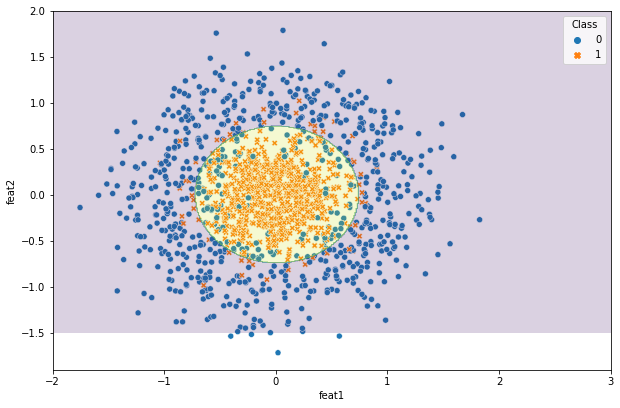

In [20]:
zz_lr3 = deg2mod.predict_proba(X_grid)[:,1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(10, 6.6))
sns.scatterplot(x='feat1',y='feat2',hue='Class',style='Class',data=cluster_df)
plt.contourf(xx, yy, zz_lr3 > 0.5, alpha=0.2)
plt.show()

In [21]:
deg2_mod=ols(formula='Class~feat1+feat2+np.power(feat1,2)+np.power(feat2,2)',data=cluster_df).fit()
deg2_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     405.7
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          9.23e-237
Time:                        16:14:43   Log-Likelihood:                -537.39
No. Observations:                1500   AIC:                             1085.
Df Residuals:                    1495   BIC:                             1111.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8745      0.013     67.752      0.000       0.849       0.900
feat1                 -0.0031      0.015     -0.204      0.838      -0.033       0.027
feat2                 -0.0045      0.015     -0.291      0.771      -0.035       0.026
np.power(feat1, 2)    -0.5576      0.019    -28.804      0.000      -0.596      -0.520
np.power(feat2, 2)    -0.5483      0.019    -28.608      0.000      -0.586      -0.511
==============================================================================
Omnibus:                       81.462   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.561
Skew:                          -0.486   Prob(JB):                     6.45e-17
Kurtosis:                       2.500   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Do you think your classifier could be significantly improved by a more flexible method? Why or why not?

The classifier has been significatly improved by using second degree logistic regression model. Statistical analysis showed that any further degrees models won't have much improvement on the performance of classification model. 